# Implementación de la regresión lineal

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [14]:
# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 50 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

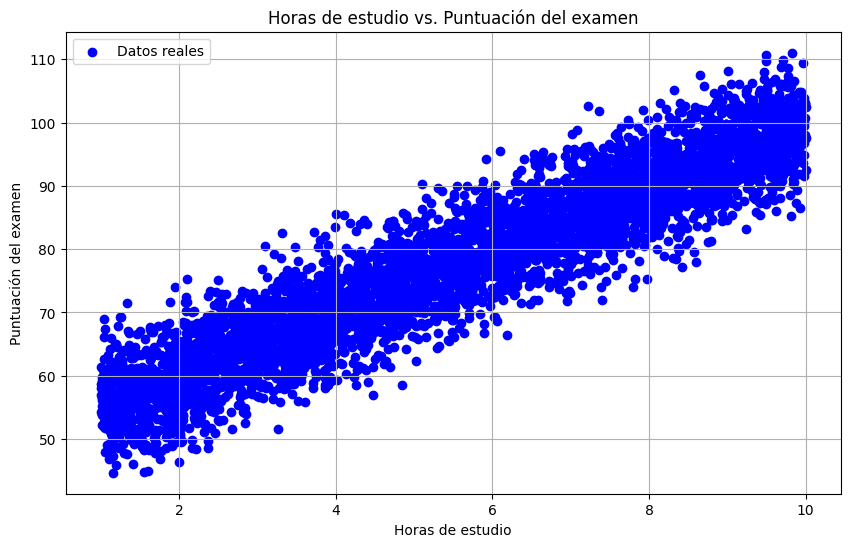

In [15]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# A COMPLETAR

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y validación en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])



Datos de Entrenamiento: 3200
Datos de Validación: 800
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [17]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    # Calcula el error cuadrático medio
    mse = ((y_true - y_pred) ** 2).mean()
    return mse

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Inicializar los coeficientes (pesos) w y b
    w = 0
    b = 0

    # Listas para almacenar las pérdidas
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # Bucle que itera por epoch
    for epoch in range(epochs):
        # Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred_train = w * X_train + b

        # Calcular las pérdidas de entrenamiento
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes para los pesos w y b
        gradient_w = (-2 / len(X_train)) * np.sum((y_train - y_pred_train) * X_train)
        gradient_b = (-2 / len(X_train)) * np.sum(y_train - y_pred_train)

        # Actualizar los pesos w y b
        w -= lr * gradient_w
        b -= lr * gradient_b

        # Calcular y_pred del conjunto de validación por epoch
        y_pred_val = w * X_val + b

        # Calcular las pérdidas de validación
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

        # Mostrar el progreso (opcional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train MSE: {train_loss}, Val MSE: {val_loss}")

    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [18]:
# Hiperparámetros
lr = 0.1
epochs = 100

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

Epoch 0: Train MSE: 6150.666198612952, Val MSE: 241561.68575967985


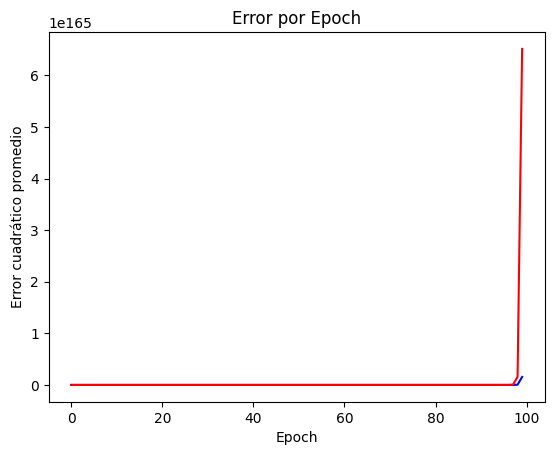

In [19]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 6.609333952767429e+165


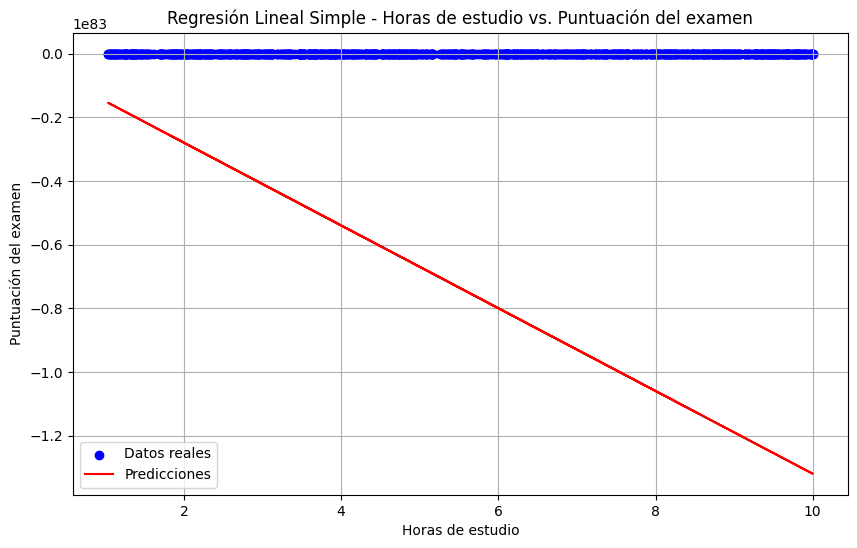

In [20]:
# Realizar predicciones en test
y_pred = w * X_test + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)


MSE en el conjunto de test: 6.609333952767429e+165
MAE en el conjunto de test: 7.362227159318658e+82
R^2 en el conjunto de test: -3.315933267545061e+163
MAPE en el conjunto de test: 9.008575448690666e+82


## Implementación de la regresión lineal usando sklearn

In [24]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()

# Reshape de X_train y y_train si son 1D
X_train_reshaped = X_train.reshape(-1, 1)
y_train_reshaped = y_train.reshape(-1, 1)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_reshaped, y_train_reshaped)


LinearRegression()

Costo del modelo: 25.252964425596577


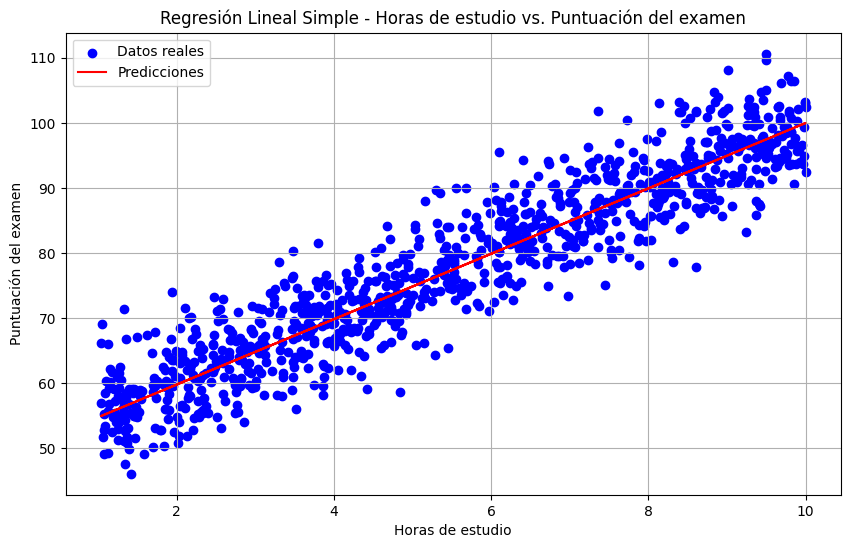

In [25]:
# Realizar predicciones en test
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = model.predict(X_test_reshaped)

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en entrenamiento
y_train_pred = model.predict(X_train_reshaped)

# Calcular las métricas de evaluación mse, mae, r2 y mape
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

print("MSE en el conjunto de entrenamiento:", mse_train)
print("MAE en el conjunto de entrenamiento:", mae_train)
print("R^2 en el conjunto de entrenamiento:", r2_train)
print("MAPE en el conjunto de entrenamiento:", mape_train)


MSE en el conjunto de entrenamiento: 23.474545062495253
MAE en el conjunto de entrenamiento: 3.834987243291654
R^2 en el conjunto de entrenamiento: 0.8766302290070875
MAPE en el conjunto de entrenamiento: 20.83244957837682


## Comparación de parámetros obtenidos

In [27]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: -1.957903929895546e+81
Coeficiente de pendiente (w) - Manual: -1.300437773689084e+82
Coeficiente de intercepción (b) - Scikit-learn: [49.74091638]
Coeficiente de pendiente (w) - Scikit-learn: [5.02464467]
